<a href="https://colab.research.google.com/github/Shemonti/DDSCNet/blob/main/Copy_of_Breast_Histopathology_Images_Depthwise_Seperable__Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import fnmatch
import os
import PIL
import glob
import tensorflow as tf
from matplotlib.image import  imread
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt

from PIL import Image

In [ ]:
!unrar x -Y "/content/drive/MyDrive/data_used (1).rar"

Streaming output truncated to the last 5000 lines.
Extracting  data_used/IDC/12906_idx5_x1701_y1701_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1751_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1801_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1851_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1901_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1951_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y2001_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y2151_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y2201_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y2251_class1.png               35%  OK 
Extracting  data_used/IDC/129

In [ ]:
import pathlib
dt_dir='/content/data_used'
data_dir = pathlib.Path(dt_dir)
data_dir

PosixPath('/content/data_used')

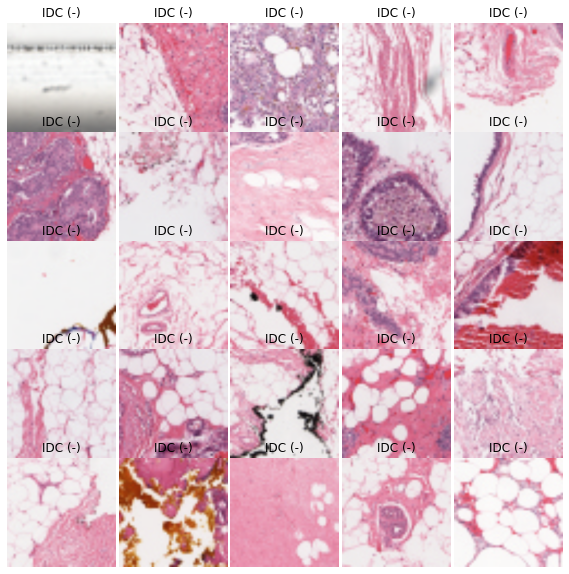

In [ ]:
NORMAL=list(data_dir.glob('NORMAL/*.png'))
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for imgname in NORMAL[:25]:
    im = cv2.imread(str(imgname))
    im = cv2.resize(im, (227, 227))
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.axis('off')
    plt.title('IDC (-)')
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB));
     #.set_title(l)

    i_ += 1

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

7500


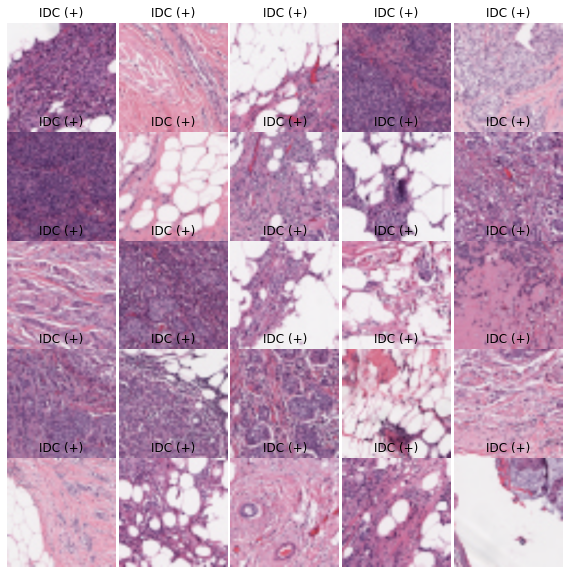

In [ ]:
IDC=list(data_dir.glob('IDC/*.png'))
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for imgname in IDC[:25]:




    im = cv2.imread(str(imgname))
    im = cv2.resize(im, (227, 227))
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.axis('off')
    plt.title('IDC (+)')
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB));
     #.set_title(l)

    i_ += 1

In [ ]:
breast_images_dict = {
    'IDC(-)': list(data_dir.glob('NORMAL/*.png')),
    'IDC(+)': list(data_dir.glob('IDC/*.png')),

}

In [ ]:
breast_labels_dict = {
    'IDC(-)': 0,
    'IDC(+)': 1

}

In [ ]:
X, y = [], []

for breast_name, images in breast_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        im = cv2.resize(img, (64, 64))
        X.append(im)
        y.append(breast_labels_dict[breast_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(7500, 64, 64, 3)

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
len(y)

7500

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(5250, 64, 64, 3) (675, 64, 64, 3) (1575, 64, 64, 3) (5250,) (675,) (1575,)


In [ ]:
len(X_train)

5250

In [ ]:
len(X_test)

675

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
X_val_scaled = X_val / 255

In [ ]:
data_augmentation = keras.Sequential(
  [
   layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(64,
                                                              64,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
    # import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
class DepthNet:

	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)

      # CONV => RELU => POOL
		model.add(SeparableConv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
		# # (CONV => RELU => POOL) * 2
		# model.add(SeparableConv2D(64, (3, 3), padding="same"))
		# model.add(Activation("relu"))
		# model.add(BatchNormalization())
		# model.add(SeparableConv2D(64, (3, 3), padding="same"))
		# model.add(Activation("relu"))
		# model.add(BatchNormalization())
		# model.add(MaxPooling2D(pool_size=(2, 2)))
		# model.add(Dropout(0.25))
		# (CONV => RELU => POOL) * 3
		model.add(SeparableConv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(SeparableConv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(SeparableConv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
  # first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(256))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))
		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))
		# return the constructed network architecture
		return model

In [ ]:

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [ ]:
NUM_EPOCHS = 40
INIT_LR = 1e-2
BS = 32
model = DepthNet.build(width=64, height=64, depth=3,classes=2)
opt = Adagrad(lr=INIT_LR, decay=INIT_LR / NUM_EPOCHS)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
''' Callbacks with Checkpoint'''



accuracy_threshold = 0.98

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/best_model/model_depthwise2"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train_scaled, y_train, epochs=50,validation_data = (X_val_scaled,y_val),callbacks=[callback_list],batch_size=10)

Epoch 1/50
525/525 [==============================] - ETA: 0s - loss: 0.3851 - accuracy: 0.8491
Epoch 1: val_accuracy improved from -inf to 0.60635, saving model to /content/drive/MyDrive/best_model/model_depthwise2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/best_model/model_depthwise2/assets
525/525 [==============================] - 24s 22ms/step - loss: 0.3851 - accuracy: 0.8491 - val_loss: 19.6630 - val_accuracy: 0.6063
Epoch 2/50
523/525 [============================>.] - ETA: 0s - loss: 0.2886 - accuracy: 0.8866
Epoch 2: val_accuracy improved from 0.60635 to 0.82095, saving model to /content/drive/MyDrive/best_model/model_depthwise2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/best_model/model_depthwise2/assets
525/525 [==============================] - 9s 17ms/step - loss: 0.2884 - accuracy: 0.8865 - val_loss: 0.4099 - val_accuracy: 0.8210
Epoch 3/50
523/525 [============================>.] - ETA: 0s - loss: 0.2899 - accuracy: 0.8816
Epoch 3: val_accu

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model("/content/drive/MyDrive/best_model/model_depthwise2")

In [ ]:
model.evaluate(X_test_scaled,y_test)

22/22 [==============================] - 0s 9ms/step - loss: 0.1702 - accuracy: 0.9289


[0.17021189630031586, 0.9288889169692993]

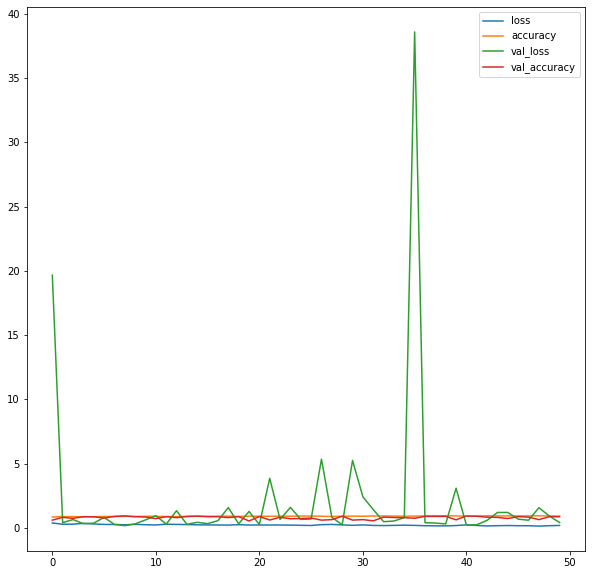

In [ ]:
model_loss = pd.DataFrame(history.history)
model_loss.plot()

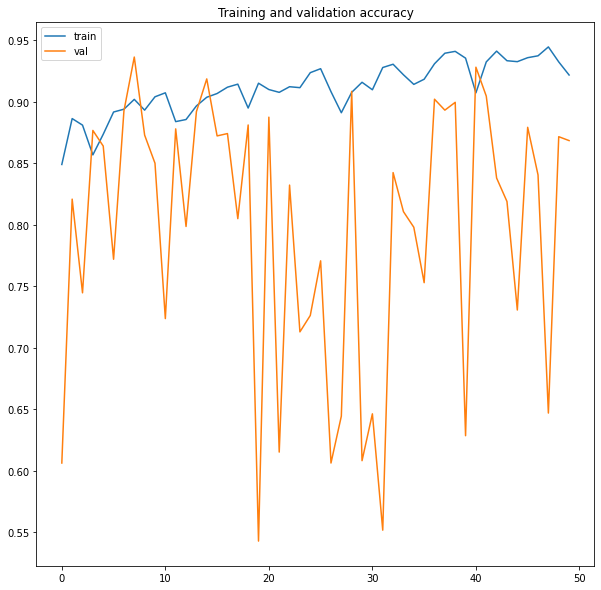

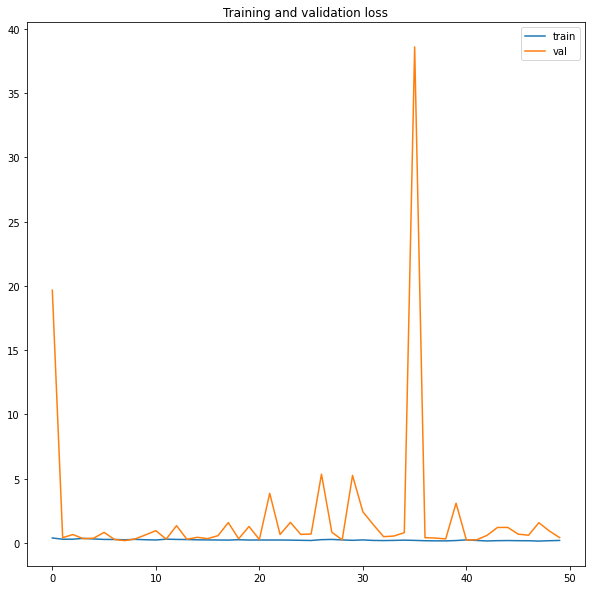

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )

plt.title ('Training and validation accuracy')
plt.legend(['train', 'val'])
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )
plt.legend(['train', 'val'])

In [ ]:
predictions = model.predict(X_test_scaled)
predictions[:5]

array([[0.9818481 , 0.01815182],
       [0.30082536, 0.69917464],
       [0.10829408, 0.891706  ],
       [0.0507924 , 0.9492076 ],
       [0.35920247, 0.64079756]], dtype=float32)

In [ ]:
y_pred = [np.argmax(element) for element in predictions]
y_pred[:5]

[0, 1, 1, 1, 1]

In [ ]:
y_test[:5]

array([0, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       416
           1       0.88      0.95      0.91       259

    accuracy                           0.93       675
   macro avg       0.92      0.93      0.93       675
weighted avg       0.93      0.93      0.93       675



In [ ]:
confusion=(confusion_matrix(y_test,y_pred))

Text(87.0, 0.5, 'Truth')

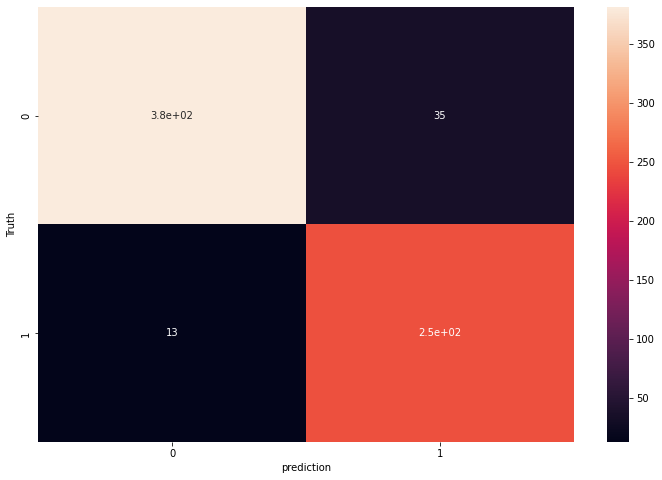

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion,annot=True)
plt.xlabel('prediction')
plt.ylabel('Truth')

In [ ]:
from sklearn import metrics

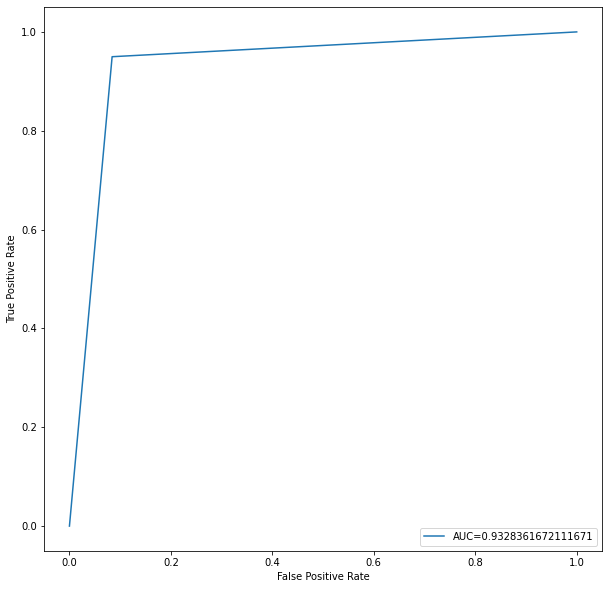

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()